/home/nm/Bureau/Jupyter_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:150: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


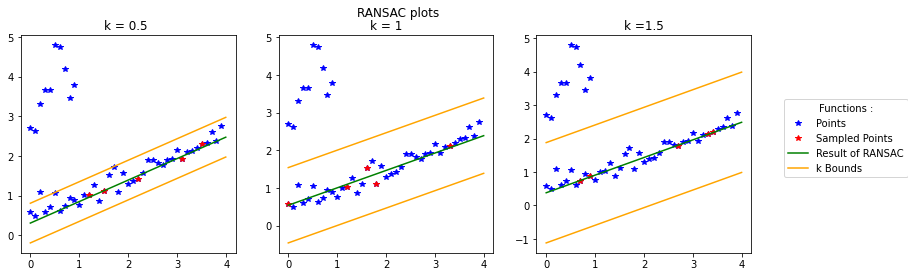

/home/nm/Bureau/Jupyter_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:176: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


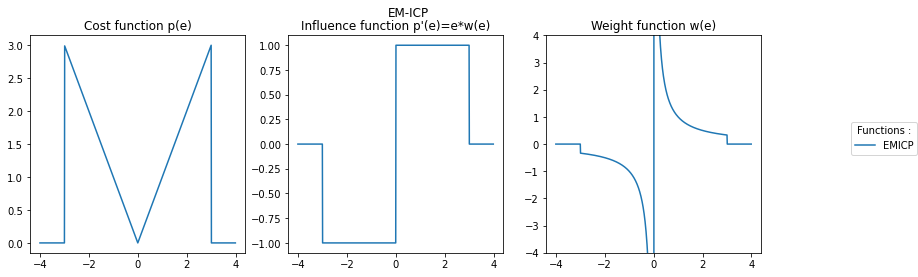

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random

e = np.arange(-4,4,0.01)

def Fair(e,k):
    p = np.power(k,2)*((np.absolute(e)/k)-np.log(1+(np.absolute(e)/k)))
    w = 1/(1+(np.absolute(e)/k))
    i = w*e
    m = p*w
    return (p,w,i,m)

def SparseICP(e,k):
    p = np.exp(k*np.log(np.absolute(e)))
    w = k*np.exp((k-2)*np.log(np.absolute(e)))
    i = w*e
    m = p*w
    return (p,w,i,m)

def WLS(x,y,w):#needed for RANSAC, BiDistance, RMT
    x_m = sum(w*x)/sum(w)
    y_m = sum(w*y)/sum(w)
    slope = sum(w*(x-x_m)*(y-y_m))/sum(w*(x-x_m)*(x-x_m))
    inter = y_m-slope*x_m
    v = slope*x+inter
    return(v,slope,inter)

def RANSAC(x,y,s,c,k):#too lazy to pass a cloud of points so x and y are arguments
    inlier_saved = 0
    slope_saved = 0
    inter_saved = 0
    #Sample : select s random number contained in the cloud of point
    P = [[0 for i in range(2)] for j in range (x.size)] #Creating Point cloud in list to use random.sample
    for t in range(x.size):
        P[t][0] = x[t]
        P[t][1] = y[t]
    for j in range(c):#Number of computations
        random_vals = random.sample(P,s)
        random_x = [0 for i in range(s)]
        random_y = [0 for i in range(s)]
        for i in range(len(random_vals)):
            random_x[i] = random_vals[i][0]
            random_y[i] = random_vals[i][1]
        random_x = np.asarray(random_x,np.float64)#organised random sample of x
        random_y = np.asarray(random_y,np.float64)#organised random sample of y
        #Compute : create a model from the points (exemple : line for linear regression)
        w = [1 for i in range(random_x.size)]
        w = np.asarray(w,np.float64)
        [v,slope,inter]=WLS(random_x,random_y,w)#model is unweigthed linear regression
        #Score : number of inliers contained in a [-k;k] distance from the model slope
        inlier = 0
        for i in range (x.size):
            d = np.sqrt(np.power((y[i]-(slope*x[i]+inter)),2))
            if(d <= np.absolute(k)):
                inlier = inlier +1
        #Save : save if number of inliers is greater than before
        e_debug = np.arange(0,4,0.01)
        if(inlier_saved<=inlier):
            slope_saved = slope
            inter_saved = inter
            inlier_saved= inlier
            saved_random_x = random_x
            saved_random_y = random_y
    return (saved_random_x,saved_random_y,slope_saved,inter_saved)

def BiDistance(e,k,B):#B is closest match's closest distance 
    w = [0 for i in range (e.size)]#to match sizes for plotting
    for i in range (e.size):
        w[i] = np.exp(k*(B-1))
    return (w)

def EMICP(e):
    p = [0 for i in range(e.size)]
    w = [0 for i in range(e.size)]
    i = [0 for j in range(e.size)]
    for j in range (e.size):
        if(np.absolute(e[j])<=3):
            p[j] = np.absolute(e[j])
            w[j] = 1/e[j]
            i[j] = p[j]*w[j]
        else:
            p[j] = 0
            w[j] = 0
            i[j] = 0
    return (p,w,i)

def RMT(e,dt):
    w= [0 for i in range (e.size)]
    for i in range (e.size):
        if(e[i]<=dt):
            w[i] = 1
        else:
            w[i] = 0
    i = w*e
    w = np.asarray(w,np.float64)
    return (w,i)

#----------------------------------------------------------------------------
e_plot = np.arange(-4,4,0.01)

#Simplified Problem
np.random.seed(5)

x_inliers = np.arange(0,4,0.1)
x_outliers = np.arange(0,1,0.1)


y_inliers = 0.5*x_inliers+0.5+0.2*np.random.randn(40)
y_outliers = x_outliers+np.random.randn(10)+3

real_slope = 0.5
real_inter = 0.5

x=np.concatenate((x_inliers,x_outliers))
y=np.concatenate((y_inliers,y_outliers))
#-----------------------------------------------------------------------------
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
fig.suptitle('RANSAC plots')

# Labels to use in the legend for each line
line_labels = ["Points","Sampled Points","Result of RANSAC","k Bounds"]
e_model = np.arange(0,4,0.01)
(r_x,r_y,slope,inter) = RANSAC(x,y,5,5,0.5)
l1 = ax1.plot(x,y,"*",color="blue")[0]
l2 = ax1.plot(r_x,r_y,"*",color="red")[0]
l3 = ax1.plot(e_model,(slope*e_model+inter),color="green")
l4 = ax1.plot(e_model,(slope*e_model+inter+0.5),e_model,(slope*e_model+inter-0.5),color="orange")

(r_x,r_y,slope,inter) = RANSAC(x,y,5,5,0.5)
l1 = ax2.plot(x,y,"*",color="blue")[0]
l2 = ax2.plot(r_x,r_y,"*",color="red")[0]
l3 = ax2.plot(e_model,(slope*e_model+inter),color="green")
l4 = ax2.plot(e_model,(slope*e_model+inter+1),e_model,(slope*e_model+inter-1),color="orange")

(r_x,r_y,slope,inter) = RANSAC(x,y,5,5,0.5)
l1 = ax3.plot(x,y,"*",color="blue")[0]
l2 = ax3.plot(r_x,r_y,"*",color="red")[0]
l3 = ax3.plot(e_model,(slope*e_model+inter),color="green")
l4 = ax3.plot(e_model,(slope*e_model+inter+1.5),e_model,(slope*e_model+inter-1.5),color="orange")

ax1.title.set_text('k = 0.5 ')
ax2.title.set_text("k = 1")
ax3.title.set_text('k =1.5') 
# Create the legend
fig.legend([l1, l2, l3],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Functions :",  # Title for the legend
           )
plt.subplots_adjust(right=0.85)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
fig.suptitle('EM-ICP')

# Labels to use in the legend for each line
line_labels = ["EMICP"]
e_model = np.arange(0,4,0.01)
(p,w,i) = EMICP(e)
l1 = ax1.plot(e,p)[0]
l2 = ax2.plot(e,i)[0]
l3 = ax3.plot(e,w)

ax3.set_ylim([-4,4])

ax1.title.set_text('Cost function p(e)')
ax2.title.set_text("Influence function p'(e)=e*w(e)")
ax3.title.set_text('Weight function w(e)') 
# Create the legend
fig.legend([l1, l2, l3],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Functions :",  # Title for the legend
           )
plt.subplots_adjust(right=0.85)
plt.show()



/home/nm/Bureau/Jupyter_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:103: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


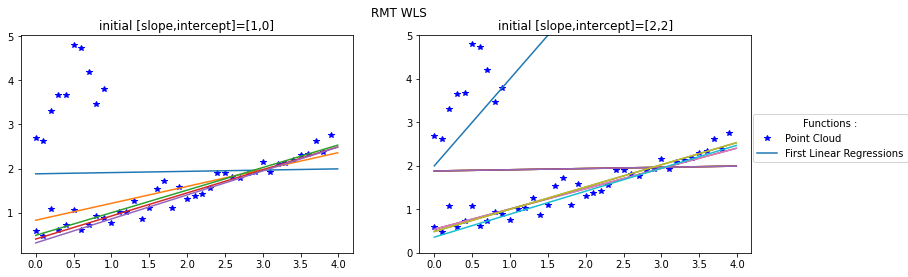

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import random

def WLS(x,y,w):#needed for RANSAC, BiDistance, RMT
    x_m = sum(w*x)/sum(w)
    y_m = sum(w*y)/sum(w)
    slope = sum(w*(x-x_m)*(y-y_m))/sum(w*(x-x_m)*(x-x_m))
    inter = y_m-slope*x_m
    v = slope*x+inter
    return(v,slope,inter)

def RMT(e,dt):
    w= [0 for i in range (e.size)]
    for i in range (e.size):
        if(e[i]<=dt):
            w[i] = 1
        else:
            w[i] = 0
    return (w)

e_plot = np.arange(-4,4,0.01)

#Simplified Problem
np.random.seed(5)

x_inliers = np.arange(0,4,0.1)
x_outliers = np.arange(0,1,0.1)

inter = 0.5+0.2*np.random.randn(40)
y_inliers = 0.5*x_inliers+inter
y_outliers = x_outliers+np.random.randn(10)+3

real_slope = 0.5
real_inter = np.mean(inter)

x=np.concatenate((x_inliers,x_outliers))
y=np.concatenate((y_inliers,y_outliers))
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle('RMT WLS')

# Labels to use in the legend for each line
line_labels = ["Point Cloud","First Linear Regressions"]
#---------------------RMT----------------------------
ax1.clear()
l1 = ax1.plot(x,y,"*",color="blue")[0]
#intialisation
niter=5
e_plot=np.arange(0,4,0.01)
new_slope = 1
new_inter = 0
for t in range(niter):
    #Compute new model values (y_new, e)
    slope = new_slope
    inter = new_inter
    y_new = x*slope+inter
    plt.plot(e_plot,e_plot*slope+inter)
    e=y-(y_new)#Compute error points relative to reference point cloud
    #Compute dt
    if(t==0):
        dt=np.amax(np.absolute(e))
    else:
        dt = np.mean(np.absolute(y_new-y_old))
    #Outlier weighting
    w=RMT(e,dt)#Compute new weights
    (v,new_slope,new_inter)=WLS(x,y,w)#Compute new slope based on weighting
    y_old = y_new#Save for relative translation motion threshold
    l2 = ax1.plot(e_plot,e_plot*new_slope+new_inter)[0]
ax2.clear()
l3 = ax2.plot(x,y,"*",color="blue")[0]
#intialisation
niter=5
e_plot=np.arange(0,4,0.01)
new_slope = 2
new_inter = 2
for t in range(niter):
    #Compute new model values (y_new, e)
    slope = new_slope
    inter = new_inter
    y_new = x*slope+inter
    plt.plot(e_plot,e_plot*slope+inter)
    e=y-(y_new)#Compute error points relative to reference point cloud
    #Compute dt
    if(t==0):
        dt=np.amax(np.absolute(e))
    else:
        dt = np.mean(np.absolute(y_new-y_old))
    #Outlier weighting
    w=RMT(e,dt)#Compute new weights
    (v,new_slope,new_inter)=WLS(x,y,w)#Compute new slope based on weighting
    y_old = y_new#Save for relative translation motion threshold
    l4 = ax2.plot(e_plot,e_plot*new_slope+new_inter)[0]

ax1.title.set_text('initial [slope,intercept]=[1,0]')
ax2.title.set_text("initial [slope,intercept]=[2,2]")
ax2.set_ylim([0,5])
# Create the legend
fig.legend([l1, l2, l3, l4],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Functions :",  # Title for the legend
           )
plt.subplots_adjust(right=0.85)
plt.show()

/home/nm/Bureau/Jupyter_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:95: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


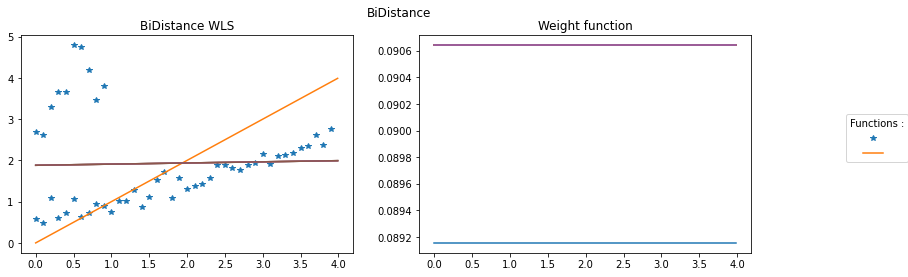

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import random

def WLS(x,y,w):#needed for RANSAC, BiDistance, RMT
    x_m = sum(w*x)/sum(w)
    y_m = sum(w*y)/sum(w)
    slope = sum(w*(x-x_m)*(y-y_m))/sum(w*(x-x_m)*(x-x_m))
    inter = y_m-slope*x_m
    v = slope*x+inter
    return(v,slope,inter)

def BiDistance(e,k,B):#B is closest match's closest distance 
    w = [0 for i in range (e.size)]#to match sizes for plotting
    for i in range (e.size):
        w[i] = np.exp(k*(B-1))
    return (w)

e_plot = np.arange(-4,4,0.01)

#Simplified Problem
np.random.seed(5)

x_inliers = np.arange(0,4,0.1)
x_outliers = np.arange(0,1,0.1)

inter = 0.5+0.2*np.random.randn(40)
y_inliers = 0.5*x_inliers+inter
y_outliers = x_outliers+np.random.randn(10)+3

real_slope = 0.5
real_inter = np.mean(inter)

x=np.concatenate((x_inliers,x_outliers))
y=np.concatenate((y_inliers,y_outliers))

line_labels = ["Point Cloud","First Linear Regressions"]
#---------------------BiDi----------------------------
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle('BiDistance')

# Labels to use in the legend for each line
line_labels = ["Point Cloud","Linear Regression","FirWeight function"]

l1 = ax1.plot(x, y,"*")[0]
#intialisation
niter=5
e_plot=np.arange(0,4,0.01)
new_slope = 1
new_inter = 0
for t in range(niter):
    #Compute new model values (y_new, e)
    slope = new_slope
    inter = new_inter
    y_new = x*slope+inter
    l2 = ax1.plot(e_plot,e_plot*new_slope+new_inter)[0]
    e=y-(y_new)#Compute error points relative to reference point cloud
    #Compute B
    B=np.amin(e)
    #Outlier weighting
    w=BiDistance(e,1,B)#Compute new weights
    (v,new_slope,new_inter)=WLS(x,y,w)#Compute new slope based on weighting
    y_old = y_new#Save for relative translation motion threshold
    
#intialisation
ax2.clear()
niter=5
e_plot=np.arange(0,4,0.01)
new_slope = 1
new_inter = 0
for t in range(niter):
    #Compute new model values (y_new, e)
    slope = new_slope
    inter = new_inter
    y_new = x*slope+inter
    e=y-(y_new)#Compute error points relative to reference point cloud
    #Compute B
    B=np.amin(e)
    #Outlier weighting
    w=BiDistance(e,1,B)#Compute new weights
    w_plot=BiDistance(e_plot,1,B)
    l3 = ax2.plot(e_plot,w_plot)[0]
    (v,new_slope,new_inter)=WLS(x,y,w)#Compute new slope based on weighting
    y_old = y_new#Save for relative translation motion threshold
    
ax1.title.set_text('BiDistance WLS')
ax2.title.set_text("Weight function")

# Create the legend
fig.legend([l1, l2, l3],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Functions :",  # Title for the legend
           )
plt.subplots_adjust(right=0.85)
plt.show()

/home/nm/Bureau/Jupyter_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:43: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


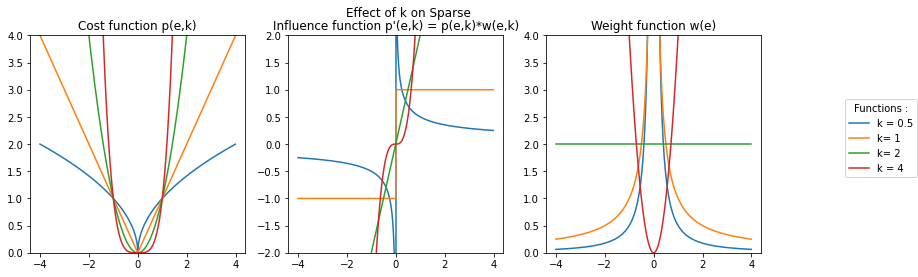

In [40]:
def SparseICP(e,k):
    p = np.exp(k*np.log(np.absolute(e)))
    w = k*np.exp((k-2)*np.log(np.absolute(e)))
    i = w*e
    m = p*w
    return (p,w,i,m)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
fig.suptitle('Effect of k on Sparse')

# Labels to use in the legend for each line
line_labels = ["k = 0.5","k= 1","k= 2", "k = 4"]

(p,w,i,m) = SparseICP(e,0.5)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]
(p,w,i,m) = SparseICP(e,1)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]
(p,w,i,m) = SparseICP(e,2)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]
(p,w,i,m) = SparseICP(e,4)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

ax1.set_ylim([0,4])
ax2.set_ylim([-2,2])
ax3.set_ylim([0,4])

ax1.title.set_text('Cost function p(e,k)')
ax2.title.set_text("Influence function p'(e,k) = p(e,k)*w(e,k)")
ax3.title.set_text('Weight function w(e)') 
# Create the legend
fig.legend([l1, l2, l3],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Functions :",  # Title for the legend
           )
plt.subplots_adjust(right=0.85)
plt.show()